In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
X,y = make_regression(n_samples = 4, n_features = 1,  n_informative = 1, n_targets = 1, noise = 80, random_state = 13)

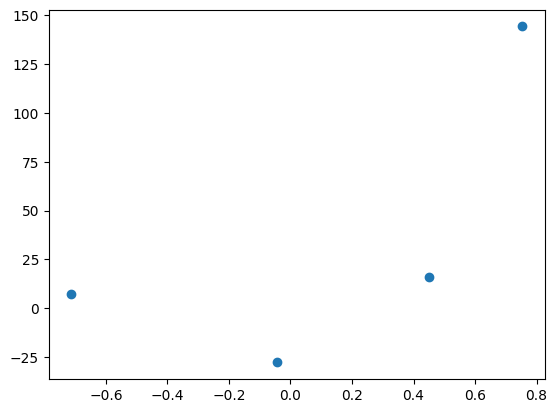

In [3]:
plt.scatter(X, y)

## Applying OLS

In [4]:
linreg = LinearRegression()
linreg.fit(X, y)
print("The slope is: ", linreg.coef_)
print("The Intercept is: ", linreg.intercept_)

The slope is:  [78.35063668]
The Intercept is:  26.15963284313262


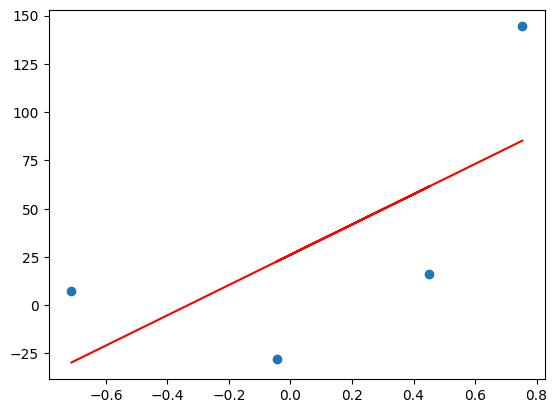

In [5]:
plt.scatter(X, y)
plt.plot(X, linreg.predict(X), color = 'red')

## Applying Gradient Descent assuming slope is contant (slope = 78.35) and let's assume the starting value for intercept is b = 0

In [6]:
"""
Here, m = 78.35, b = 0, intercept can change, however the slope will not change.
and we need to reach the value of b = 78.35, what ever it takes, and there is a
line that is wrong or it can be far from the right line.

y = mc + c
"""
y_pred = ((78.35 * X) + 0).reshape(4)

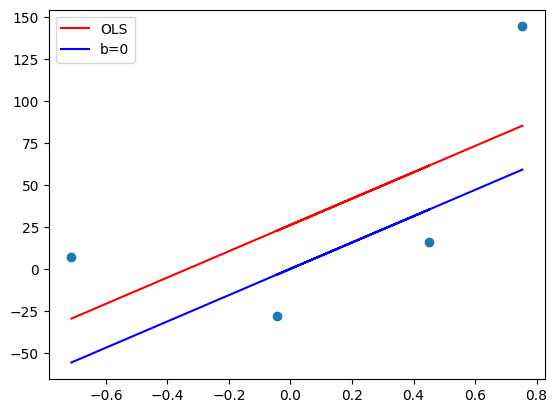

In [7]:
plt.scatter(X, y)
plt.plot(X, linreg.predict(X), color = 'red', label = 'OLS')
plt.plot(X, y_pred, color = 'blue', label = 'b=0')
plt.legend()
plt.show()

The goal is to reach the intercept to the 26.157 almost which is being displayed under the OLS.

## Iteration 1

In [8]:
m = 78.35
b = 0
# Formula: loss slope = -2 * summation(from 1 to N) [yi - mxi - b]
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
print("Loss Slope is: ", loss_slope)

Loss Slope is:  -209.27763408209216


In [9]:
# Lets, take the learning rate = 0.1
lr = 0.1
step_size = loss_slope * lr
print("Step Size: ", step_size)

Step Size:  -20.927763408209216


In [10]:
# Calculating the New Intercept
b = b - step_size
print("New Intercept: ", b)

New Intercept:  20.927763408209216


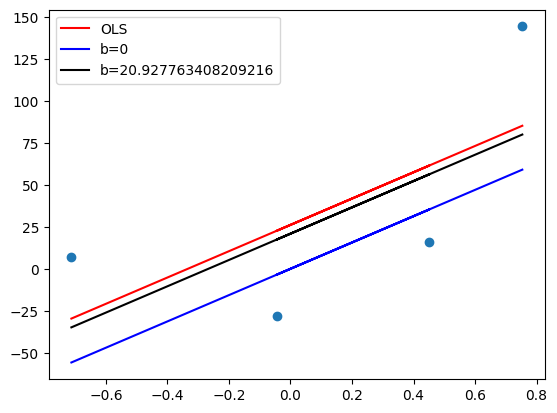

In [11]:
# Again plotting the graph to see where we reached
y_pred1 = ((78.35 * X) + b).reshape(4)
plt.scatter(X, y)
plt.plot(X, linreg.predict(X), color = 'red', label = 'OLS')
plt.plot(X, y_pred, color = 'blue', label = 'b=0')
plt.plot(X, y_pred1, color = 'black', label = 'b={}'.format(b))
plt.legend()
plt.show()

## Iteration 2

In [12]:
print("------------- II Iteration --------------")
loss_slope = -2 * np.sum(y - m * X.ravel()) - b
print("Loss Slope is: ", loss_slope)

------------- II Iteration --------------
Loss Slope is:  -230.20539749030138


In [13]:
lr = 0.1
step_size = loss_slope * lr
print("Step Size: ", step_size)
b = b - step_size
print("New Intercept: ", b)

Step Size:  -23.02053974903014
New Intercept:  43.94830315723935


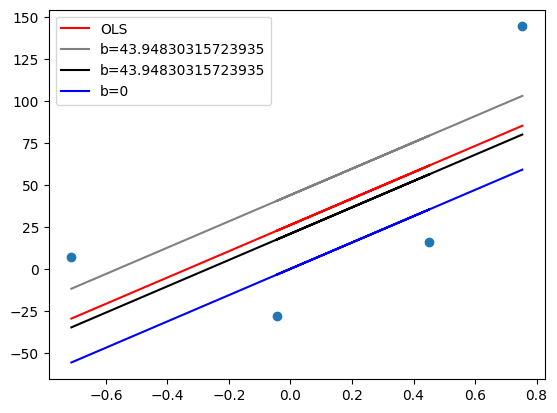

In [14]:
y_pred2 = ((78.35 * X) + b).reshape(4)
plt.scatter(X, y)
plt.plot(X, linreg.predict(X), color = 'red', label = 'OLS')
plt.plot(X, y_pred2, color = 'Grey', label = 'b={}'.format(b))
plt.plot(X, y_pred1, color = 'black', label = 'b={}'.format(b))
plt.plot(X, y_pred, color = 'blue', label = 'b=0')
plt.legend()
plt.show()

## Iteration 3

In [15]:
print("------------- III Iteration --------------")
loss_slope = -2 * np.sum(y - m * X.ravel()) - b
print("Loss Slope is: ", loss_slope)
lr = 0.1
step_size = loss_slope * lr
print("Step Size: ", step_size)
b = b - step_size
print("New Intercept: ", b)

------------- III Iteration --------------
Loss Slope is:  -253.22593723933153
Step Size:  -25.322593723933153
New Intercept:  69.2708968811725


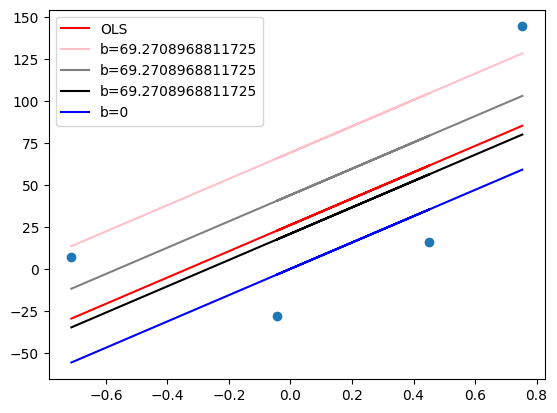

In [16]:
y_pred3 = ((78.35 * X) + b).reshape(4)
plt.scatter(X, y)
plt.plot(X, linreg.predict(X), color = 'red', label = 'OLS')
plt.plot(X, y_pred3, color = 'Pink', label = 'b={}'.format(b))
plt.plot(X, y_pred2, color = 'Grey', label = 'b={}'.format(b))
plt.plot(X, y_pred1, color = 'black', label = 'b={}'.format(b))
plt.plot(X, y_pred, color = 'blue', label = 'b=0')
plt.legend()
plt.show()

## Gradient Descent in the Loop

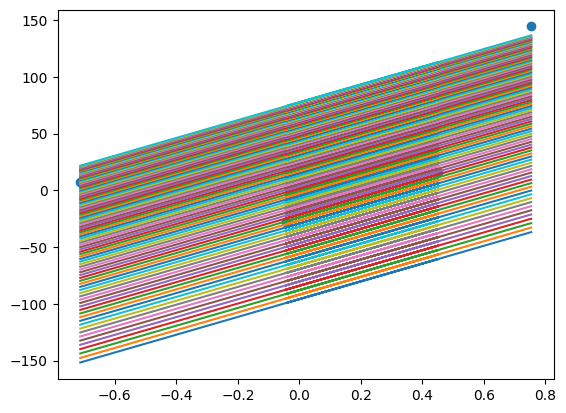

In [17]:
b = -100
m = 78.35
lr = 0.01
epochs = 100
for i in range(epochs):
  loss_slope = -2 * (np.sum(y - m * X.ravel()) - b)
  b = b - (loss_slope * lr)
  y_pred = m * X + b
  plt.plot(X, y_pred)
plt.scatter(X, y)